In [1]:
import matplotlib
import requests
import json
import pylab
import io
import numpy as np
from astropy.io import ascii
from astropy.table import Table
from astropy.io.votable import parse,parse_single_table,from_table, writeto
from astropy.coordinates import SkyCoord
from astropy import units as u

In [ ]:
'''
rutas
http://3.212.59.238:8787/radio-degree
http://3.212.59.238:8787/radio-degree-nearest # entrega un solo objeto en caso de encontrar
http://3.212.59.238:8787/radio-hms
http://3.212.59.238:8787/radio-hms-nearest # entrega un solo objeto en caso de encontrar
'''

In [2]:
def consulta_degree(ra,dec,radius,format,catalog):
    url = 'http://127.0.0.1:5000/radio-degree'
    params = {'ra':ra,'dec':dec,'radius':radius,'format':format,'catalog':catalog}
    r = requests.post(url, data=params)
    return r

In [3]:
def consulta_hms(hms,radius,format,catalog):
    url = 'http://127.0.0.1:5000/radio-hms'
    params = {'hms':hms,'radius':radius,'format':format,'catalog':catalog}
    r = requests.post(url, data=params)
    return r

In [4]:
#consulta por grados
rdg = consulta_degree(139.33444972,68.6350604,0.0002777,'csv','ztf')

In [5]:
# clave de catalogos consultados
catalog = rdg.json().keys()
catalog

dict_keys(['curve_ztf'])

In [6]:
#claves de los elementos en X catalogo
rdg.json()['curve_ztf'].keys()

dict_keys(['1848215200006181', '841108100002803', '841208100004637'])

In [7]:
#consulta hours
#hms_tuple(h=9.0, m=17.0, s=20.26793280000689)
#hms_tuple(h=4.0, m=34.0, s=32.414496000003936)
#'9h17m20.26793280000689s + 4h34m32.414496000003936s'

rhms = consulta_hms('9h17m20.26793280000689s + 4h34m32.414496000003936s',0.0002777,'votable','ztf,ps1' )
#rhrs.text

In [9]:
catalog_hms = rhms.json().keys()
catalog_hms

dict_keys(['curve_ps1', 'curve_ztf'])

In [8]:
rhms.json()['curve_ztf'].keys()

dict_keys(['1848215200006181', '841108100002803', '841208100004637'])

In [12]:
# devuelve la tabla de astropy (para procesesar)en caso de recibir un VOTable
votable = rhms.json()['curve_ztf']['1848215200006181'].encode(encoding='UTF-8')
bio = io.BytesIO(votable)
table = parse_single_table(bio).to_table()
table

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
,,d,d,mag,mag,,,deg,deg,,,,,,,mag,mag,mag,,,s,,
int64,int32,float64,float64,float32,float32,int32,object,float64,float64,float32,float32,int64,int32,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,int32
1848215200006181,68534672,2458439.8487261995,58439.3467245,14.812388,0.010627259,0,zr,139.3344517,68.6350696,1.251,0.025,20181117346725,1848,15,2,21.07,25.934923,0.029220562,0.09071297,2.4725716e-05,30.0,1.782,2
1848215200006181,68834674,2458442.848916023,58442.3467477,14.68032,0.010582386,32768,zr,139.3344459,68.6350708,0.438,-0.005,20181120346713,1848,15,2,19.48,25.443281,0.07455926,0.08373893,0.00018429228,30.0,1.727,2
1848215200006181,69445563,2458448.95812676,58448.4556366,14.564754,0.010563088,0,zr,139.3344546,68.6350707,0.833,0.0,20181126455602,1848,15,2,20.39,26.127449,0.029332612,0.091096,2.5088662e-05,30.0,1.247,2
1848215200006181,69542348,2458449.9260226064,58449.4234838,14.566062,0.010563211,0,zr,139.3344296,68.6350623,0.767,0.049,20181127423484,1848,15,2,20.78,26.142992,0.024987929,0.091695316,1.8074616e-05,30.0,1.312,2
1848215200006181,72243163,2458476.9352070414,58476.4316319,14.111308,0.010633541,0,zr,139.3344171,68.6350685,0.572,0.027,20181224431632,1848,15,2,20.62,26.128452,0.02624794,0.08898855,1.9773155e-05,30.0,1.181,2
1848215200006181,72745324,2458481.956929598,58481.4532407,14.360865,0.010568685,0,zr,139.3343829,68.6350885,0.871,-0.007,20181229453241,1848,15,2,20.53,26.13246,0.028952507,0.09266664,2.4481273e-05,30.0,1.169,2
1848215200006181,78037050,2458534.8736852934,58534.3705093,13.895456,0.010731635,0,zr,139.3345263,68.6352901,1.509,0.021,20190220370451,1848,15,2,18.97,26.112165,0.045237727,0.10235295,9.374093e-05,30.0,1.22,1
1848215200006181,78622905,2458540.731990671,58540.2290509,13.990696,0.0106840795,0,zr,139.334429,68.6350604,0.85,0.026,20190226229051,1848,15,2,21.59,26.117912,0.026266078,0.09380243,1.9790385e-05,30.0,1.221,1


In [10]:
# devuelve la tabla de astropy, en caso de recivir un csv
tabla = ascii.read(rdg.json()['curve_ztf']['1848215200006181'],  format='csv', guess=False)
tabla

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64
1848215200006181,68534672,2458439.8487261995,58439.3467245,14.8123884,0.0106272586,0,zr,139.3344517,68.6350696,1.25100005,0.0250000004,20181117346725,1848,15.0,2.0,21.0699997,25.9349232,0.0292205624,0.090712972,2.47257158e-05,30,1.78199995,2
1848215200006181,68834674,2458442.848916023,58442.3467477,14.6803198,0.0105823856,32768,zr,139.3344459,68.6350708,0.437999994,-0.00499999989,20181120346713,1848,15.0,2.0,19.4799995,25.4432812,0.0745592564,0.0837389305,0.000184292279,30,1.727,2
1848215200006181,69445563,2458448.95812676,58448.4556366,14.5647535,0.0105630876,0,zr,139.3344546,68.6350707,0.833000004,0.0,20181126455602,1848,15.0,2.0,20.3899994,26.127449,0.0293326117,0.0910959989,2.50886624e-05,30,1.24699998,2
1848215200006181,69542348,2458449.9260226064,58449.4234838,14.566062,0.0105632106,0,zr,139.3344296,68.6350623,0.76700002,0.0489999987,20181127423484,1848,15.0,2.0,20.7800007,26.142992,0.0249879286,0.0916953161,1.80746156e-05,30,1.31200004,2
1848215200006181,72243163,2458476.9352070414,58476.4316319,14.1113081,0.0106335413,0,zr,139.3344171,68.6350685,0.572000027,0.0270000007,20181224431632,1848,15.0,2.0,20.6200008,26.1284523,0.0262479391,0.08898855,1.97731551e-05,30,1.18099999,2
1848215200006181,72745324,2458481.956929598,58481.4532407,14.3608646,0.0105686849,0,zr,139.3343829,68.6350885,0.870999992,-0.00700000022,20181229453241,1848,15.0,2.0,20.5300007,26.1324596,0.0289525073,0.0926666409,2.44812727e-05,30,1.16900003,2
1848215200006181,78037050,2458534.8736852934,58534.3705093,13.8954563,0.0107316347,0,zr,139.3345263,68.6352901,1.50899994,0.0209999997,20190220370451,1848,15.0,2.0,18.9699993,26.1121655,0.0452377275,0.102352947,9.37409277e-05,30,1.22000003,1
1848215200006181,78622905,2458540.731990671,58540.2290509,13.990696,0.0106840795,0,zr,139.334429,68.6350604,0.850000024,0.0260000005,20190226229051,1848,15.0,2.0,21.5900002,26.1179123,0.0262660775,0.0938024297,1.97903846e-05,30,1.22099996,1
1848215200006181,80419596,2458558.698007525,58558.1959606,13.8278322,0.0107691614,0,zr,139.3344451,68.6351031,1.44200003,0.00300000003,20190316195903,1848,15.0,2.0,19.7700005,26.1010895,0.0427166298,0.107573532,5.3005846e-05,30,1.204,1


In [13]:
rhms.json()['curve_ps1'].keys()

dict_keys(['190361393344112894'])

In [15]:
votable = rhms.json()['curve_ps1']['190361393344112894'].encode(encoding='UTF-8')
bio = io.BytesIO(votable)
table_ps1 = parse_single_table(bio).to_table()
table_ps1

objID,detectID,filterID,obsTime,ra,dec,psfFlux,psfFluxErr,psfMajorFWHM,psfMinorFWHM,psfQfPerfect,apFlux,apFluxErr,infoFlag,infoFlag2,infoFlag3
,,,,deg,deg,,,,,,,,,,
int64,int64,uint8,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,int64,int32,int32
190361393344112894,153443866410000015,3,55635.4389349,139.33447819,68.63506142,0.00884387,1.0088e-05,1.54851,1.49581,0.904706,0.00867947,1.03268e-05,102760517,128,7374912
190361393344112894,153445192410000017,3,55635.4521903,139.33449752,68.63506221,0.0082805,1.02221e-05,1.99104,1.95678,0.998999,0.00838324,1.00593e-05,102760517,128,7374912
190361393344112894,153347716310000010,1,55634.477414,139.3345207,68.63503577,0.00826192,1.14074e-05,1.88185,1.76734,0.992916,0.00861705,1.14233e-05,102760517,128,124782656
190361393344112894,153348968310000008,1,55634.4899457,139.33448821,68.63506146,0.0077373,1.10268e-05,1.81031,1.60518,0.998461,0.00792172,1.09406e-05,102760517,128,124782656
190361393344112894,153441340410000012,2,55635.4136426,139.33447173,68.6350534,0.00978758,1.10843e-05,1.67879,1.5653,0.998509,0.00990763,1.11231e-05,102760517,128,124815424
190361393344112894,153442549410000013,2,55635.4257356,139.33447732,68.63505279,0.0093621,1.1005e-05,1.34724,1.20952,0.407496,0.00950679,1.09949e-05,102760517,160,34880
190361393344112894,118025265260000028,4,55281.2528285,139.33447243,68.63507592,0.00555692,1.24274e-05,1.10782,0.949303,0.99754,0.00561698,1.21132e-05,102760517,128,7374912
190361393344112894,118026233260000017,4,55281.2625151,139.3344753,68.63507505,0.0061458,1.3184e-05,1.0867,0.965257,0.955584,0.00626052,1.2803e-05,102760517,128,7374912


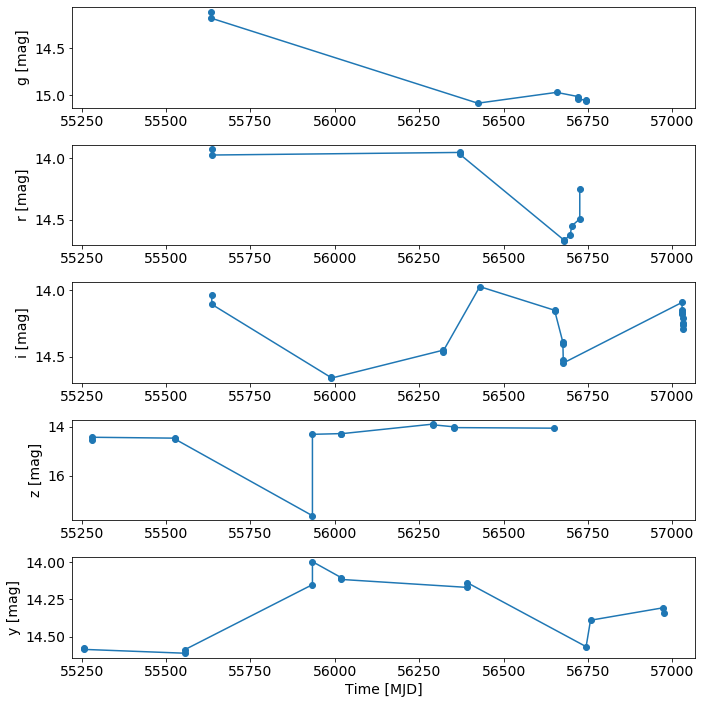

In [16]:
## para graficar, siendo una tabla de PS1
if 'curve_ps1' in catalog_hms:
    dtab_pan = table_ps1 # la tabla en astropy, de un elemento
    id2filter = np.array(list('grizy'))
    dtab_pan['filter'] = id2filter[(dtab_pan['filterID']-1).data]
    dtab_pan.sort('obsTime')
    
    # convert flux in Jy to magnitudes
    t = dtab_pan['obsTime']
    mag = -2.5*np.log10(dtab_pan['psfFlux']) + 8.90
    xlim = np.array([t.min(),t.max()])
    xlim = xlim + np.array([-1,1])*0.02*(xlim[1]-xlim[0])

    pylab.rcParams.update({'font.size': 14})
    pylab.figure(1,(10,10))
    for i, filter in enumerate("grizy"):
        pylab.subplot(511+i)
        w = np.where(dtab_pan['filter']==filter)
        pylab.plot(t[w],mag[w],'-o')
        pylab.ylabel(filter+' [mag]')
        pylab.xlim(xlim)
        pylab.gca().invert_yaxis()
    # if i==0:
       # pylab.title(objname)
    pylab.xlabel('Time [MJD]')
    pylab.tight_layout()
    #print(dtab)

In [18]:
tabla_ztf = ascii.read(rdg.json()['curve_ztf']['841108100002803'],  format='csv', guess=False)
print(tabla_ztf.columns)
tabla_ztf['filtercode','field','limitmag','magzp']

<TableColumns names=('oid','expid','hjd','mjd','mag','magerr','catflags','filtercode','ra','dec','chi','sharp','filefracday','field','ccdid','qid','limitmag','magzp','magzprms','clrcoeff','clrcounc','exptime','airmass','programid')>


filtercode,field,limitmag,magzp
str2,int64,float64,float64
zg,841,19.9699993,26.2987614
zg,841,20.0,26.3244419
zg,841,20.0699997,26.1978493
zg,841,19.8500004,25.9768658
zg,841,20.3799992,26.1693344
zg,841,20.4799995,26.1755791
zg,841,21.2700005,26.2607956
zg,841,20.2999992,26.2822933
zg,841,20.2199993,26.0177231


In [ ]:
'mag{}'.format(tabla['filtercode'][0])

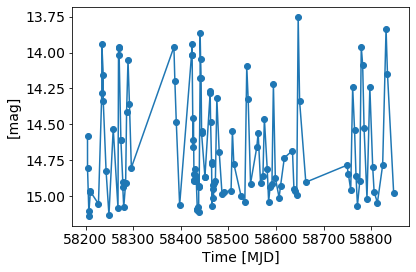

In [19]:
# Para graficar desde una tabla proveniente de ZTF
#
# En construccion
#
if 'curve_ztf' in catalog:
    dtab_ztf = tabla # la respectiva tabla de ztf
    dtab_ztf.sort('mjd')
    
    t = dtab_ztf['mjd']
    #magtag = 'mag{}'.format(tabla['filtercode'][0])
    #mag = dtab_ztf[magtag]
    pylab.rcParams.update({'font.size': 14})
    #pylab.figure(1,(10,10))
    
    pylab.plot(dtab_ztf['mjd'],dtab_ztf['mag'],'-o')
    pylab.ylabel('[mag]')
    #pylab.xlim(xlim)
    pylab.gca().invert_yaxis()
    
    pylab.xlabel('Time [MJD]')
    pylab.tight_layout()
    

In [ ]:
np.array(list('grizy'))